In [139]:
import numpy as np
import matplotlib.pyplot as plt

## Helpers

In [140]:
num_samples = 100

In [141]:
def get_sampled_energy(s):
    return np.sum( s*s ) / num_samples

## 1.1  Gram-Schmidt Orthogonalization

In [142]:
def gram_schmidt(s1, s2):
    # take phi_1 as normalized of first signal
    phi_1 = s1 / get_sampled_energy(s1)**0.5
    
    # calculate phi_2
    phi_2 = s2 - np.dot(phi_1, s2) / num_samples * phi_1
    phi_2_norm = get_sampled_energy(phi_2)**0.5
    
    if phi_2_norm == 0:
        phi_2 = np.zeros_like(phi_2)
    else:
        phi_2 /= phi_2_norm
    
    return phi_1, phi_2
    

## 1.2 Signal Space representation:

In [143]:
def signal_space(s, phi_1, phi_2):
    return np.dot(s, phi_1)/num_samples, np.dot(s, phi_2)/num_samples

## 1.3 Effect of AWGN on signal space representation

In [144]:
def add_AWGN(s, E_div_No_db, num_samples):
    E_div_No = 10 ** (E_div_No_db / 10)
    E = get_sampled_energy(s)
    mean = 0
    var = (E/E_div_No)**0.5
    
    noise = np.random.normal(mean, var, size=(num_samples, len(s)))
    
    return np.tile(s, (num_samples, 1)) + noise

## 1.4 Requirements

In [145]:
time = np.arange(0, 1, 1 / num_samples)

In [146]:
s1 = np.ones_like(time)
s1[time >= 1] = 0

s2 = np.ones_like(time)
s2[time > 0.75] = -1

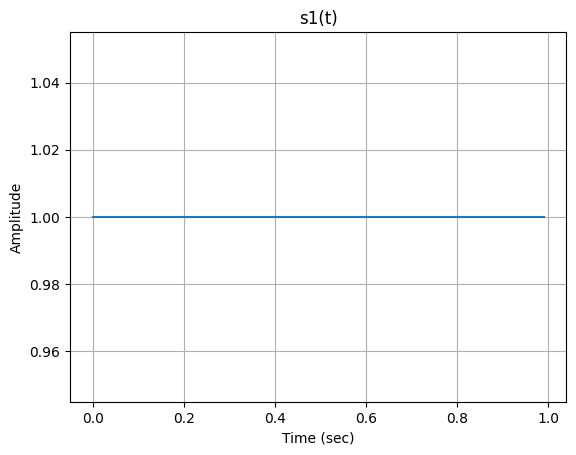

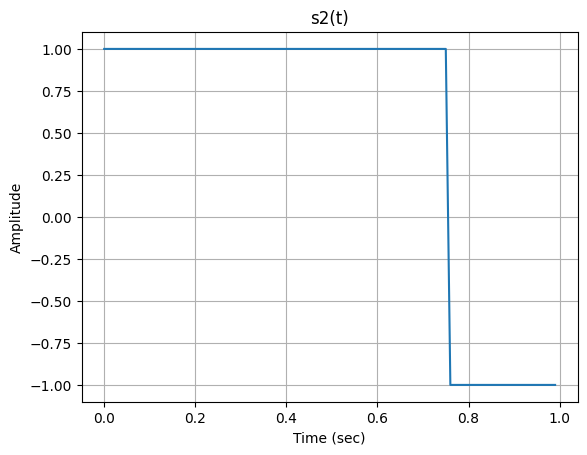

In [173]:
# plt.figure(figsize=(15, 5))

plt.plot(time, s1)
plt.title("s1(t)")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.plot(time, s2)
plt.title("s2(t)")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


### Requirment 1 (Gram Schmidt)

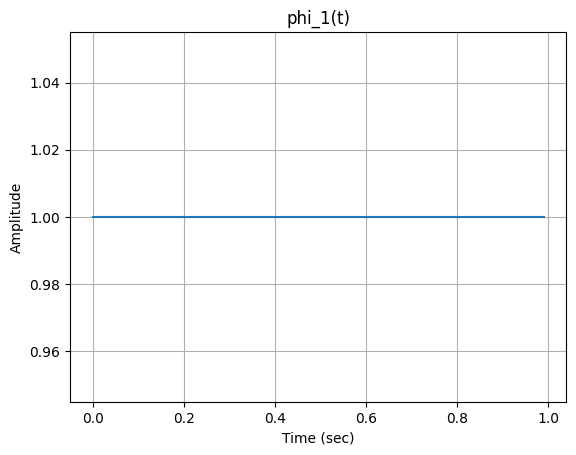

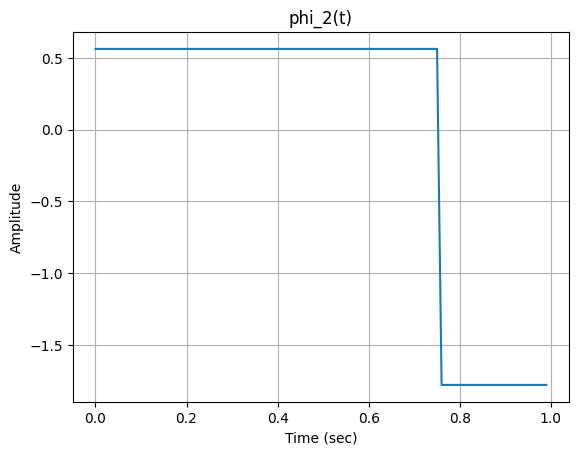

In [174]:
phi_1, phi_2 = gram_schmidt(s1, s2)




plt.plot(time, phi_1)
plt.title("phi_1(t)")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

plt.plot(time, phi_2)
plt.title("phi_2(t)")
plt.xlabel("Time (sec)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()



### Requirment 2 (Signal Space)

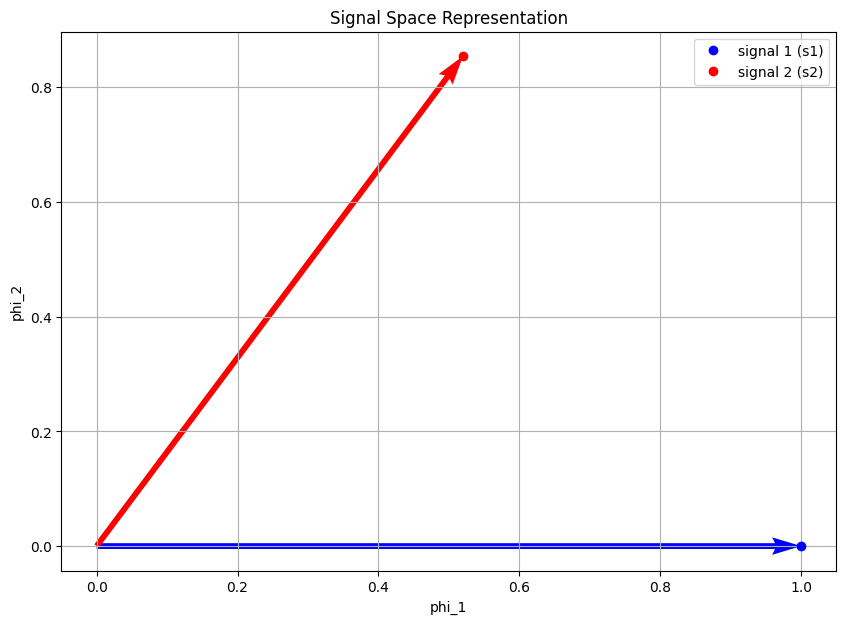

In [149]:
x1, y1 = signal_space(s1, phi_1, phi_2)
x2, y2 = signal_space(s2, phi_1, phi_2)

plt.figure(figsize=(10,7))
plt.plot(x1, y1, 'bo', label="signal 1 (s1)", linewidth=2)
plt.plot(x2, y2, 'ro', label="signal 2 (s2)", linewidth=2)
plt.quiver(0, 0, x1, y1,  angles='xy', scale_units='xy', scale=1, color='b')
plt.quiver(0, 0, x2, y2,  angles='xy', scale_units='xy', scale=1, color='r')
plt.title('Signal Space Representation')
plt.xlabel("phi_1")
plt.ylabel("phi_2")
plt.legend()
plt.grid()

### Requirment 3 (AWGN Noise)

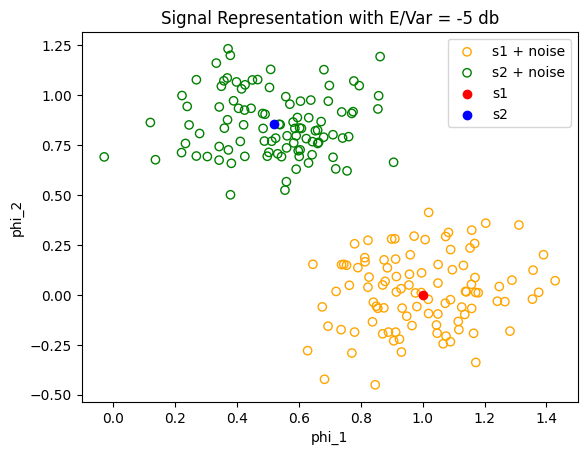

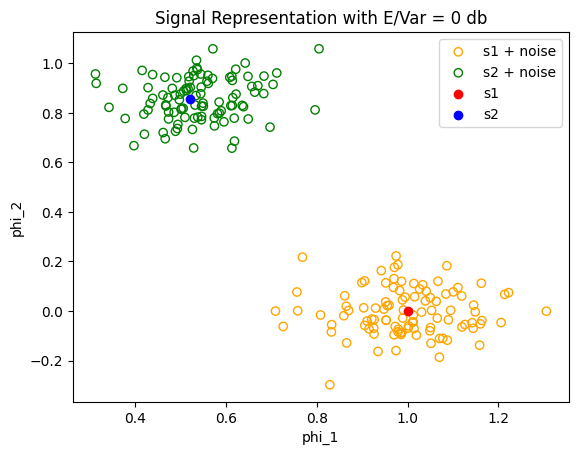

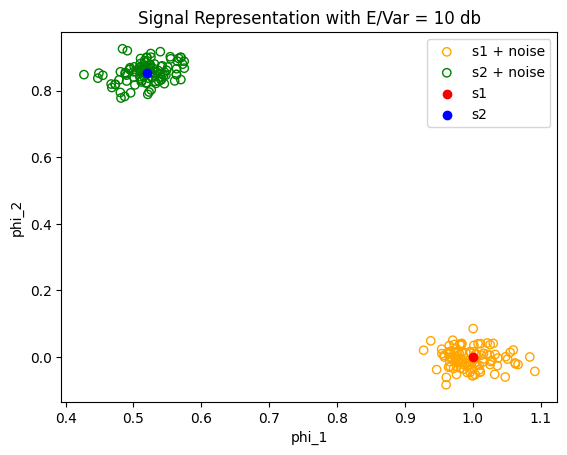

In [169]:
sigma_db_values = [-5, 0, 10]

x1, y1 = signal_space(s1, phi_1, phi_2)
x2, y2 = signal_space(s2, phi_1, phi_2)


for sigma_db in sigma_db_values:
    # add noise
    r1 = add_AWGN(s1, sigma_db, num_samples)
    r2 = add_AWGN(s2, sigma_db, num_samples)
    # get signal space
    v11, v12 = signal_space(r1, phi_1, phi_2)
    v21, v22 = signal_space(r2, phi_1, phi_2)
    
    
    # plot signal
    plt.scatter(v11, v12, label='s1 + noise', facecolors='none', edgecolors='orange')
    plt.scatter(v21, v22, label='s2 + noise', facecolors='none', edgecolors='g')
    
    plt.scatter(x1, y1, label='s1', color='r')
    plt.scatter(x2, y2, label='s2', color='b')
    plt.title(f"Signal Representation with E/Var = {sigma_db} db")
    plt.xlabel("phi_1")
    plt.ylabel("phi_2")
    plt.legend()
    plt.show()    
    